<a href="https://colab.research.google.com/github/Ravenha/DS-Unit-2-Regression-Classification/blob/master/Bethany_assignment_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.
- [ ] Add your own stretch goal(s) !

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
# Import libraries
import pandas as pd
import requests
import urllib.request
import time
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot
from sklearn.decomposition import PCA
from collections import OrderedDict
from datetime import date
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
from itertools import groupby
from math import sqrt
from numpy import linalg as LA
from mpl_toolkits import mplot3d
from numpy.linalg import matrix_rank
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.plotting import category_scatter
from sklearn.linear_model import LinearRegression
from ipywidgets import interact

In [5]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)

In [0]:
df['rooms']= df['bathrooms']+df['bedrooms'];

In [0]:
df['amenities']= ( df['hardwood_floors'] + df['doorman'] + df['dining_room'] + df['fitness_center'] + df['laundry_in_unit'])

In [0]:
df['room_amenities'] =df['rooms']+df['amenities']

In [0]:
Train1 = df[(df['created'] > '2016-4-1 01:00:00') & (df['created'] <= '2016-6-1 00:00:00')]
Train2 = df[(df['created'] > '2016-6-1 01:00:00') & (df['created'] <= '2016-7-1 00:00:00')]

In [11]:
Train1.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms,amenities,room_amenities
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,3.0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1,3.0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0,5.0
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0,6.0
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,3.0


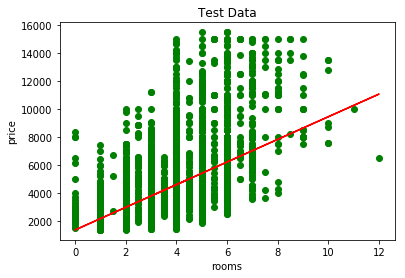

In [12]:
mod1 = LR()
feat1 = ['rooms']
targ1 = 'price'
X1 = Train1[feat1]
y1 = Train1[targ1]
mod1.fit(X1,y1)
y_pred1train = mod1.predict(X1)
y_pred1test = mod1.predict(Train2[feat1])
plt.scatter(Train2[feat1], Train2[targ1], color= 'green') # actual test data
plt.plot(Train2[feat1], y_pred1test, color='red') # model predictions of test data
plt.xlabel('rooms')
plt.ylabel('price')
plt.title('Test Data')
plt.show()

In [13]:
print('Model Coefficient: ', mod1.coef_[0])
print('Model y-intercept: ', mod1.intercept_)

Model Coefficient:  809.6813826826696
Model y-intercept:  1363.4860214142823


In [14]:
print('Train Mean Absolute Error: ', mean_absolute_error(y1,y_pred1train))
print('Train Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1,y_pred1train)))
print('Train R squared error: ', r2_score(y1,y_pred1train))
print('')
print('Test Mean Absolute Error: ', mean_absolute_error(Train2[feat1],y_pred1test))
print('Test Root Mean Squared Error: ', np.sqrt(mean_squared_error(Train2[feat1],y_pred1test)))
print('Test R squared error: ', r2_score(Train2[feat1],y_pred1test))

Train Mean Absolute Error:  893.9571083669464
Train Root Mean Squared Error:  1340.9059153962985
Train R squared error:  0.42093000521396107

Test Mean Absolute Error:  3588.8249126101873
Test Root Mean Squared Error:  3765.3290901437526
Test R squared error:  -7142874.165925103


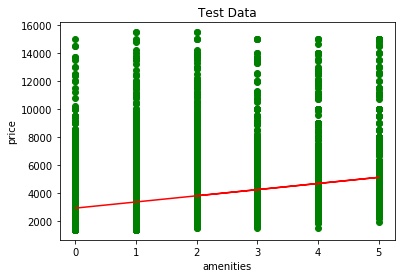

In [15]:
mod2 = LR()
feat2 = ['amenities']
targ2 = 'price'
X2 = Train1[feat2]
y2 = Train1[targ2]
mod2.fit(X2,y2)
y_pred2train = mod2.predict(X2)
y_pred2test = mod2.predict(Train2[feat2])
plt.scatter(Train2[feat2], Train2[targ2], color= 'green') # actual test data
plt.plot(Train2[feat2], y_pred2test, color='red') # model predictions of test data
plt.xlabel('amenities')
plt.ylabel('price')
plt.title('Test Data')
plt.show()

In [16]:
print('model coefficient: ', mod2.coef_[0])
print('model y-intercept: ', mod2.intercept_)

model coefficient:  439.85337392417205
model y-intercept:  2933.7667150441366


In [17]:
print('Train Mean Absolute Error: ', mean_absolute_error(y2,y_pred2train))
print('Train Root Mean Squared Error: ', np.sqrt(mean_squared_error(y2,y_pred2train)))
print('Train R squared error: ', r2_score(y2,y_pred2train))
print('')
print('Test Mean Absolute Error: ', mean_absolute_error(Train2[feat2],y_pred2test))
print('Test Root Mean Squared Error: ', np.sqrt(mean_squared_error(Train2[feat2],y_pred2test)))
print('Test R squared error: ', r2_score(Train2[feat2],y_pred2test))

Train Mean Absolute Error:  1128.3601745044234
Train Root Mean Squared Error:  1656.1515977808672
Train R squared error:  0.11664631611789378

Test Mean Absolute Error:  3562.9200260496673
Test Root Mean Squared Error:  3614.660226245644
Test R squared error:  -6775909.830247786


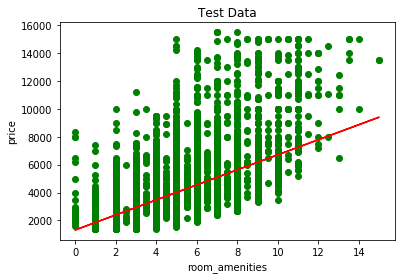

In [18]:
mod3 = LR()
feat3 = ['room_amenities']
targ3 = 'price'
X3 = Train1[feat3]
y3 = Train1[targ3]
mod3.fit(X3,y3)
y_pred3train = mod3.predict(X3)
y_pred3test = mod3.predict(Train2[feat3])
plt.scatter(Train2[feat3], Train2[targ3], color= 'green') # actual test data
plt.plot(Train2[feat3], y_pred3test, color='red') # model predictions of test data
plt.xlabel('room_amenities')
plt.ylabel('price')
plt.title('Test Data')
plt.show()

In [19]:
print('model coefficient: ', mod3.coef_[0])
print('model y-intercept: ', mod3.intercept_)

model coefficient:  539.8611635022778
model y-intercept:  1312.8882728382027


In [20]:
print('Train Mean Absolute Error: ', mean_absolute_error(y3,y_pred3train))
print('Train Root Mean Squared Error: ', np.sqrt(mean_squared_error(y3,y_pred3train)))
print('Train R squared error: ', r2_score(y3,y_pred3train))
print('')
print('Test Mean Absolute Error: ', mean_absolute_error(Train2[feat3],y_pred3test))
print('Test Root Mean Squared Error: ', np.sqrt(mean_squared_error(Train2[feat3],y_pred3test)))
print('Test R squared error: ', r2_score(Train2[feat3],y_pred3test))

Train Mean Absolute Error:  892.7035325259549
Train Root Mean Squared Error:  1337.5487029288554
Train R squared error:  0.4238259986179206

Test Mean Absolute Error:  3568.260194397153
Test Root Mean Squared Error:  3748.8086777756657
Test R squared error:  -3088938.0184500082
